<a href="https://colab.research.google.com/github/sushmitha-yetukuri/climate-agri-simulator/blob/main/climateAgriSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib seaborn


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


In [10]:
countries = ['India', 'USA', 'China', 'Brazil', 'Russia', 'Australia', 'France', 'Nigeria', 'Canada', 'Mexico']
years = np.arange(2000, 2020)

index = pd.MultiIndex.from_product([countries, years], names=['Country', 'Year'])
df = pd.DataFrame(index=index).reset_index()

df['Temperature'] = np.random.normal(loc=15, scale=5, size=len(df)) + (df['Year'] - 2000) * 0.02
df['Rainfall'] = np.random.normal(loc=1000, scale=200, size=len(df)) - (df['Year'] - 2000) * 2
df['CO2_Level'] = np.random.normal(loc=400, scale=10, size=len(df)) + (df['Year'] - 2000) * 1.5


In [8]:
base_yield = np.random.uniform(2, 4, size=len(countries))
yield_dict = dict(zip(countries, base_yield))
df['Base_Yield'] = df['Country'].map(yield_dict)

df['Crop_Yield'] = (
    df['Base_Yield'] +
    -0.01 * (df['Temperature'] - 15)**2 +
    0.0003 * df['Rainfall'] +
    -0.002 * (df['CO2_Level'] - 400) +
    np.random.normal(0, 0.1, size=len(df))
)

df['Crop_Yield'] = df['Crop_Yield'].clip(lower=0)


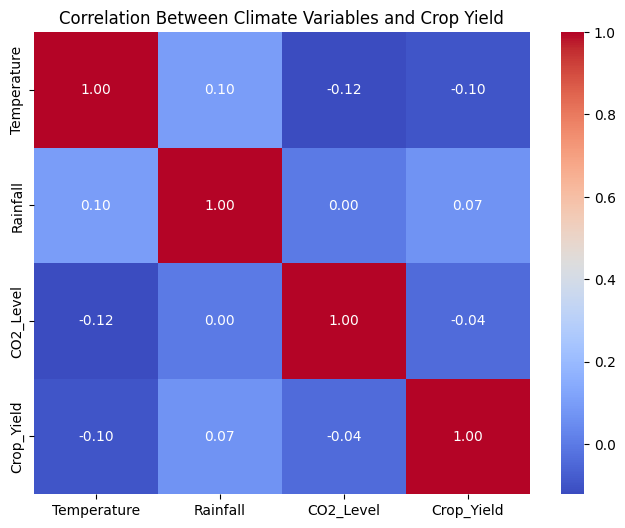

In [5]:
climate_vars = ['Temperature', 'Rainfall', 'CO2_Level', 'Crop_Yield']
corr_matrix = df[climate_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Climate Variables and Crop Yield")
plt.show()


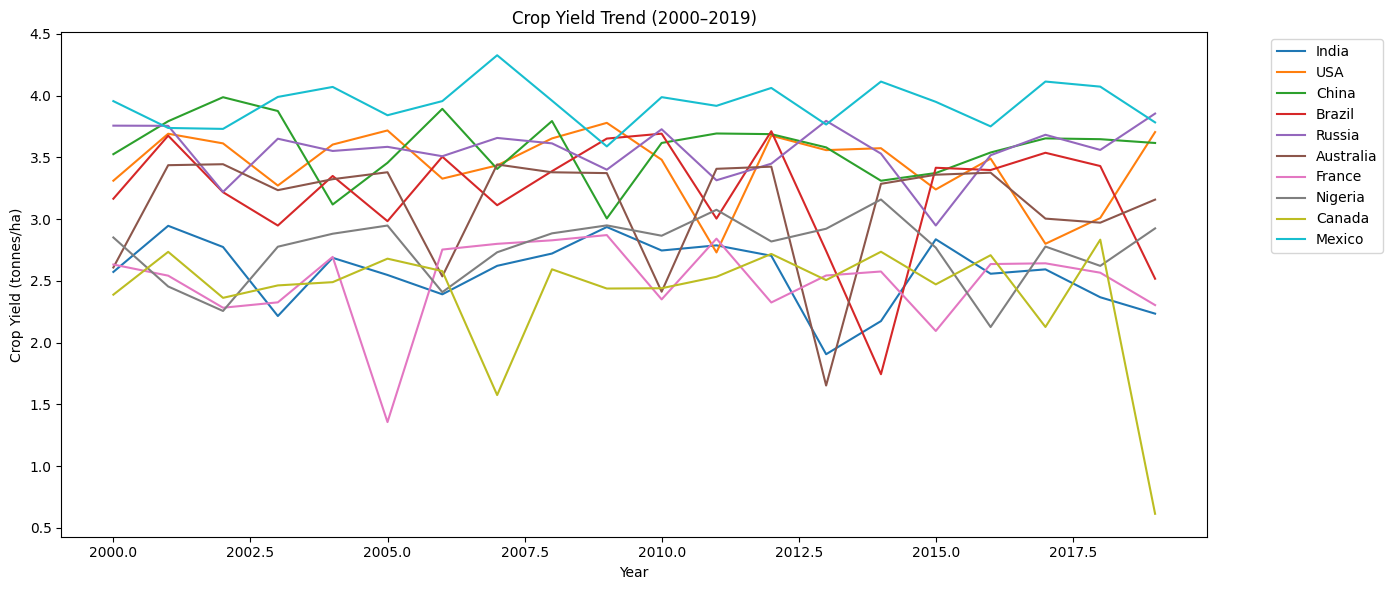

In [4]:
plt.figure(figsize=(14, 6))
for country in countries:
    yearly_avg = df[df['Country'] == country].groupby('Year')['Crop_Yield'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, label=country)

plt.title("Crop Yield Trend (2000–2019)")
plt.xlabel("Year")
plt.ylabel("Crop Yield (tonnes/ha)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


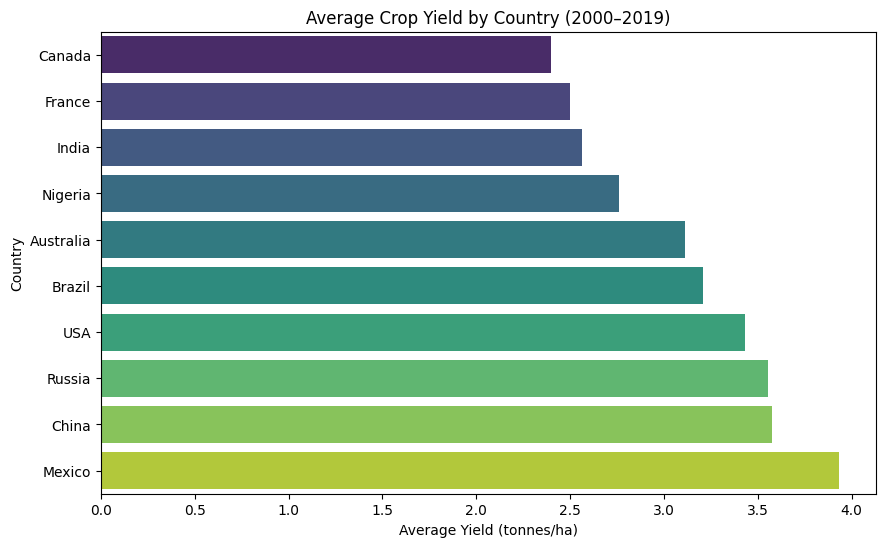

In [3]:
# Reset index so we can assign the country as hue
avg_yield_df = avg_yield_by_country.reset_index()
avg_yield_df.columns = ['Country', 'Avg_Yield']

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_yield_df, x='Avg_Yield', y='Country', hue='Country', palette="viridis", legend=False)
plt.title("Average Crop Yield by Country (2000–2019)")
plt.xlabel("Average Yield (tonnes/ha)")
plt.ylabel("Country")
plt.show()

